## Infosys Stock Price Prediction using Recurrent Neural Network

#### Part 1: Data Preprocessing

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cd G:\Done projects\RNN\Infosys Ltd

G:\Done projects\RNN\Infosys Ltd


In [3]:
pwd

'G:\\Done projects\\RNN\\Infosys Ltd'

In [4]:
# import training set
training_set=pd.read_csv("Infosys.csv")
training_set

,Date,Price,Open,High,Low,Volume,Chg%
0,01-Jan-16,548.29,545.69,550.13,542.31,1.81M,-0.01%
1,04-Jan-16,535.22,545.66,546.90,533.80,3.98M,-2.38%
2,05-Jan-16,532.81,538.49,538.49,526.96,4.95M,-0.45%
3,06-Jan-16,530.48,533.11,533.11,525.30,5.59M,-0.44%
4,07-Jan-16,521.28,525.87,529.76,519.84,5.29M,-1.73%
...,...,...,...,...,...,...,...
1594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1597,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
training_set=training_set.iloc[:,2:3].values

In [6]:
training_set

array([[545.69],
       [545.66],
       [538.49],
       ...,
       [   nan],
       [   nan],
       [   nan]])

In [7]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)

In [8]:
training_set

array([[0.07266312],
       [0.07264314],
       [0.06786951],
       ...,
       [       nan],
       [       nan],
       [       nan]])

In [9]:
# Getting the input and output
X_train= training_set[0:1257]
y_train= training_set[1:1258]

In [10]:
X_train

array([[0.07266312],
       [0.07264314],
       [0.06786951],
       ...,
       [0.58791611],
       [0.56940746],
       [0.56571238]])

In [11]:
y_train

array([[0.07264314],
       [0.06786951],
       [0.06428762],
       ...,
       [0.56940746],
       [0.56571238],
       [0.54194407]])

In [12]:
# Reshaping
X_train=np.reshape(X_train, (1257 , 1 , 1))

#### Part 2: Building the RNN

In [13]:
# importing the Keras libraries and Packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [14]:
# initialize the RNN 
model = Sequential()

In [15]:
# adding the input layer and LSTM layer
model.add(LSTM(units=256, activation= 'sigmoid', input_shape= (None,1)))

In [16]:
# adding the output layer
model.add(Dense( units=1 ))   # units= Number of outputs  

In [17]:
# compiling the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# fitting the RNN to the training set
model.fit(X_train, y_train, batch_size=128, epochs=200)

Epoch 1/200
10/10 [==============================] - 3s 8ms/step - loss: 0.0176
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0156
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0138
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0124
Epoch 5/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 6/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 7/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 8/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 9/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 10/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 11/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 12/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 13/200
10/10 [=================

#### Part 3: Making the Prediction and Visulising the result

In [19]:
# Geting the real stock price of 2017
test_set = pd.read_csv("Infosys_test.csv")
real_stock_price = test_set.iloc[:,2:3].values

In [20]:
real_stock_price

array([[1550.9 ],
       [1547.25],
       [1560.05],
       [1550.  ],
       [1540.  ],
       [1558.  ],
       [1549.95],
       [1514.  ],
       [1519.3 ],
       [1510.  ],
       [1494.9 ],
       [1522.  ],
       [1481.  ],
       [1453.  ],
       [1455.1 ],
       [1468.6 ],
       [1435.  ],
       [1418.  ],
       [1443.95],
       [1487.  ],
       [1510.7 ],
       [1513.  ],
       [1484.  ],
       [1524.9 ],
       [1516.  ],
       [1519.85],
       [1520.2 ],
       [1485.  ],
       [1486.1 ],
       [1443.6 ],
       [1410.  ],
       [1440.2 ],
       [1438.  ],
       [1391.05]])

In [21]:
# Geting the Predicted Stock Price of 2017
inputs = real_stock_price

In [22]:
inputs = sc.transform(inputs)

In [23]:
inputs = np.reshape(inputs, (real_stock_price.size , 1, 1))


In [24]:
predicted_stock_price = model.predict(inputs)

2/2 [==============================] - 1s 5ms/step


In [25]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [26]:
predicted_stock_price

array([[1550.6433],
       [1547.0149],
       [1559.7385],
       [1549.7484],
       [1539.8069],
       [1557.7007],
       [1549.699 ],
       [1513.9518],
       [1519.2229],
       [1509.973 ],
       [1494.9519],
       [1521.908 ],
       [1481.122 ],
       [1453.2554],
       [1455.3456],
       [1468.7825],
       [1435.3356],
       [1418.4075],
       [1444.2463],
       [1487.092 ],
       [1510.6693],
       [1512.9569],
       [1484.107 ],
       [1524.7921],
       [1515.9407],
       [1519.7699],
       [1520.1179],
       [1485.1022],
       [1486.1968],
       [1443.8977],
       [1410.4404],
       [1440.513 ],
       [1438.3225],
       [1391.5643]], dtype=float32)

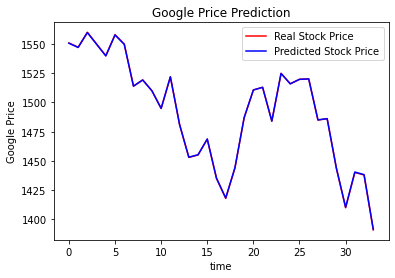

In [27]:
# Visulising the Result 
plt.plot( real_stock_price , color = 'red' , label = 'Real Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Stock Price')
plt.title('Google Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Price' )
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
r2_score(real_stock_price,predicted_stock_price)

0.9999737828232943

In [30]:
np.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))

0.23336546841310152

# 9. Save Weights & Loading the model

In [33]:
model.save('infosys_stock.h5')

In [34]:
model.load_weights('infosys_stock.h5')